In [1]:
import os
import PyPDF2
import fitz
import pandas as pd

In [2]:
from nltk import tokenize
# import nltk
# nltk.download('punkt')

In [3]:
dir = 'annoted_sustainability_reports/Consumer_Staples/'


### Extracting Sentences

In [4]:
# aggregated sentences per report
highlighted_num = []
highlighted_sentences = [] 
all_sentences = []
highlighted_label = []
all_label = []

# aggregated sentences of the entire industry (tokenizing highlighted_result & all_result)
rel_text = []
rel_label = []
all_text_final = []


x_label = ["Mondelez_Intl", "Hershey", "Philip_Morris_Intl", "PepsiCo", "Altria_Environmental", "PandG", "Altria_TCFD",
     "Costco", "CocaCola", "Altria_2021", "Walmart", "EsteeLauder"]

for file in os.listdir(dir): # running all the files in the industry folder
    f = os.path.join(dir, file) # joining filename and directory
    print(f)
    
    # labelling sentences by companies 
    res = list(filter(lambda x:  x in f, x_label))

    doc = fitz.open(f) # opening each company report
    print(doc)
    
    # results of each report
    highlighted_result = []
    all_result = [] 
    
    # Iterate each page of the document 
    for page in doc:
        
        # extract all the sentences in pdf 
        test = page.get_text()
        all_result.append(test)
        
        # extracting highlighted sentences from pdf 
        highlights = []
        annot = page.first_annot
        
        while annot:
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try:
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else:
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0, len(all_coordinates), 4)]
                        for i in range(0,len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next
        
        # calculate coordinate sum to eliminate duplicated sentences 
        coordinate_sum_total = []
        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
                num_i = 0
                for w in all_words:
                    if (fitz.Rect(w[0:4]).intersects(h)):
                        if str(sum(w[0:4])) not in coordinate_sum_total: #if no duplicate coordinate sum found, append
                            coordinate_sum_total.append(str(sum(w[0:4])))
                            sentence.append(w[4])
            
                highlight_text.append(" ".join(sentence))
        
#         print(highlight_text)
        
        if len(highlight_text) > 0:
            highlighted_result.append(" ".join(highlight_text))
        
#         print(result)

    # Results of the entire industry & keeps track of number of sentences in highlighted_num
    highlighted_num.append(len(highlighted_result))
    highlighted_sentences.append(highlighted_result)
    all_sentences.append(all_result)
    
    print(len(highlighted_result))
    
#         print(test_text)
        
    for r in highlighted_result:
        if r is not None:
            # tokenize sentences by pages where the sentences is found 
            # instead of conducting it to the entire report this enhances accuracy 
            rel_text += tokenize.sent_tokenize(r)
            highlighted_label.append(res)
            rel_label += res * len(tokenize.sent_tokenize(r))         
    
    for i in all_result:
        all_text_final += tokenize.sent_tokenize(i.replace("\n", " "))
        all_label += res * len(tokenize.sent_tokenize(i.replace("\n", " ")))
        
#     print(highlighted_sentences, "\n", len(highlighted_sentences))



annoted_sustainability_reports/Consumer_Staples/Mondelez_Intl_2021_Snacking_Made_Right_ESG_Report.pdf
Document('annoted_sustainability_reports/Consumer_Staples/Mondelez_Intl_2021_Snacking_Made_Right_ESG_Report.pdf')
6
annoted_sustainability_reports/Consumer_Staples/Hershey_2021_esg_report.pdf
Document('annoted_sustainability_reports/Consumer_Staples/Hershey_2021_esg_report.pdf')
5
annoted_sustainability_reports/Consumer_Staples/Philip_Morris_Intl_2021_integrated_report.pdf
Document('annoted_sustainability_reports/Consumer_Staples/Philip_Morris_Intl_2021_integrated_report.pdf')
4
annoted_sustainability_reports/Consumer_Staples/PepsiCo_2021_ESG_report.pdf
Document('annoted_sustainability_reports/Consumer_Staples/PepsiCo_2021_ESG_report.pdf')
5
annoted_sustainability_reports/Consumer_Staples/Altria_Environmental_Data.pdf
Document('annoted_sustainability_reports/Consumer_Staples/Altria_Environmental_Data.pdf')
0
annoted_sustainability_reports/Consumer_Staples/PandG_2019_Environmental_Susta

In [5]:
highlighted_num

[6, 5, 4, 5, 0, 4, 0, 0, 5, 1, 1, 8]

In [6]:
rel_text_df = pd.DataFrame([rel_text, rel_label]).transpose()
rel_text_df = rel_text_df.rename(columns = {0: 'relevant_sentences', 1: 'company_label'})
rel_text_df

,relevant_sentences,company_label
0,"By 2025, reduce end-to-end CO2e emissions by 1...",Mondelez_Intl
1,Climate Action For the past few years we have ...,Mondelez_Intl
2,"zero, In the goals, which is subject to verifi...",Mondelez_Intl
3,"meantime, we continue to deliver against our 2...",Mondelez_Intl
4,"In 2021, we reduced our Scope 1 and 2 (market-...",Mondelez_Intl
...,...,...
89,"As of fiscal 2021, our total solar capacity is...",EsteeLauder
90,"During the fiscal year, we generated more than...",EsteeLauder
91,"In fiscal 2021, Aveda launched carbon-neutral ...",EsteeLauder
92,Reduction of emissions due to conservation and...,EsteeLauder


In [7]:
all_text_final_df = pd.DataFrame([all_text_final, all_label]).transpose()
all_text_final_df = all_text_final_df.rename(columns = {0: 'all_sentences', 1: 'company_label'})
all_text_final_df

,all_sentences,company_label
0,2021 ESG Report Snacking Made Right,Mondelez_Intl
1,Governance Sustainable Snacking Colleague & Co...,Mondelez_Intl
2,We provide many of the world’s favorite snack ...,Mondelez_Intl
3,"This is what motivates us, day-in-day-out, al...",Mondelez_Intl
4,Whether it’s taking a bite out of your favorit...,Mondelez_Intl
...,...,...
12787,"EXCLUSIONS Each year, we aim to refine our e...",EsteeLauder
12788,Metrics exclude GHG emissions associated with ...,EsteeLauder
12789,UNCERTAINTY GHG emissions quantification is s...,EsteeLauder
12790,Environmental and energy use data used in GHG ...,EsteeLauder


### Getting Sentence Statistics 

In [8]:
# count rel sentences 
rel_count = rel_text_df.groupby('company_label', sort = False).count()

# count all sentences
sent_count = all_text_final_df.groupby('company_label', sort = False).count()

In [9]:
sentences_list = []
rel_sent_list = []

final_text_stat = pd.concat([sent_count, rel_count],  sort = False, axis = 1)

[rel_sent_list.append(rel_sent) for rel_sent in final_text_stat['relevant_sentences']]    
[sentences_list.append(all_sent) for all_sent in final_text_stat['all_sentences']]    
    
final_text_stat['relevant_sentences'] = final_text_stat['relevant_sentences'].fillna(0)
final_text_stat['percentages'] = final_text_stat['relevant_sentences'] / final_text_stat['all_sentences'] * 100
final_text_stat

,all_sentences,relevant_sentences,percentages
company_label,,,
Mondelez_Intl,1505,22.0,1.461794
Hershey,1348,14.0,1.038576
Philip_Morris_Intl,3826,10.0,0.261370
PepsiCo,246,8.0,3.252033
Altria_Environmental,27,0.0,0.000000
PandG,837,12.0,1.433692
Altria_TCFD,348,0.0,0.000000
Costco,129,0.0,0.000000
CocaCola,1304,9.0,0.690184


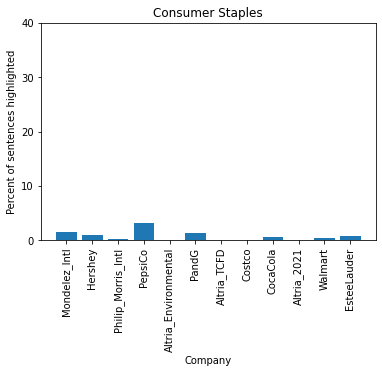

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import glob
y = []

x = ["Mondelez_Intl", "Hershey", "Philip_Morris_Intl", "PepsiCo", "Altria_Environmental", "PandG", "Altria_TCFD",
     "Costco", "CocaCola", "Altria_2021", "Walmart", "EsteeLauder"]


i = 0

for file in os.listdir(dir):
    y.append(100 * (rel_sent_list[i])/sentences_list[i])
    i = i+1

plt.bar(x, y, width = 0.8)
plt.xticks(rotation='vertical')
plt.title("Consumer Staples")
plt.xlabel("Company")
plt.ylabel("Percent of sentences highlighted")
plt.yticks(np.arange(0, 50, 10))
plt.show()

In [11]:
import pandas as pd

series = pd.Series(y)
series.describe()

count    9.000000
mean     1.059647
std      0.946108
min      0.143472
25%      0.445765
50%      0.809935
75%      1.433692
max      3.252033
dtype: float64

### Exporting and Saving Files 

In [12]:
#storing variable so they can be called between notebooks (for aggregate analysis, test/train data sets, and modeling later on)

CONSTA_reltext = rel_text_df
CONSTA_alltext = all_text_final_df
CONSTA_stat = final_text_stat

%store CONSTA_reltext
%store CONSTA_alltext
%store CONSTA_stat

Stored 'CONSTA_reltext' (DataFrame)
Stored 'CONSTA_alltext' (DataFrame)
Stored 'CONSTA_stat' (DataFrame)
